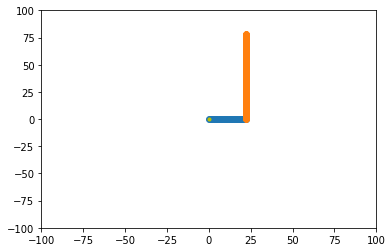

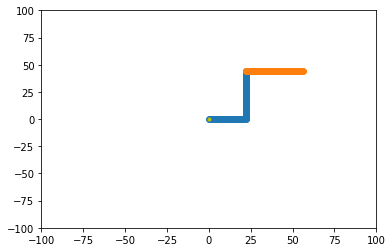

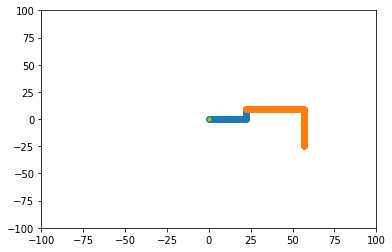

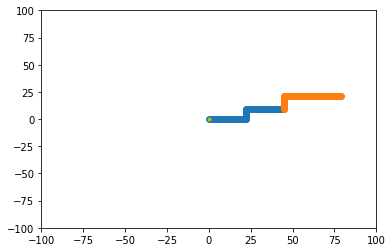

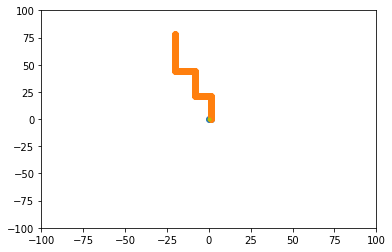

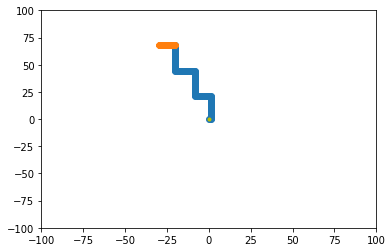

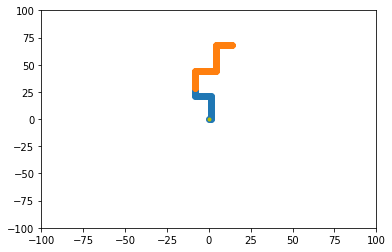

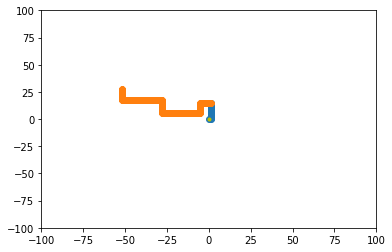

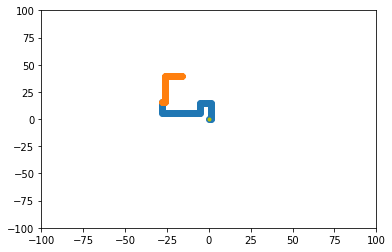

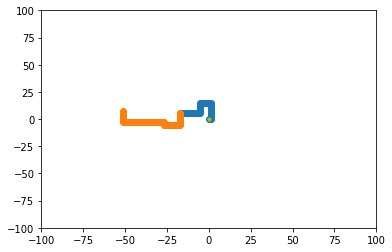

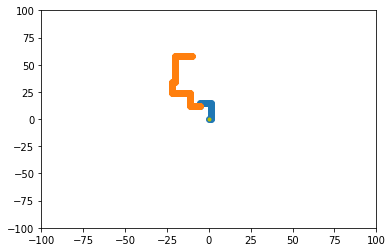

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 19 22:23:14 2018

@author: rahrah
"""

import numpy as np
import matplotlib.pyplot as plt
import random
import math

%matplotlib inline 
n = 100
straight_line = np.zeros((n+1,2), dtype=int)
for i in range(n+1):
    straight_line[i][0] = i
    

def draw(path, last_pivot_node=n):
    x = path[:,0]
    y = path[:,1]
    plt.plot(x[:last_pivot_node+1], y[:last_pivot_node+1], '-o')
    plt.plot(x[last_pivot_node:], y[last_pivot_node:], '-8')
    plt.plot(0, 0, 'y.') # yellow dot for (0.0)
    plt.xlim(-n,n)
    plt.ylim(-n,n)
    # plt.savefig(img_filename.format(t))
    plt.show()


def rotate_90_after_node(old_path, k):
    new_path = old_path.copy()
    node = old_path[k]
    for j in range(k,n+1): 
        new_path[j] = node + np.array([[0,1],[-1,0]]).dot(old_path[j] - node)
    return new_path

def rotate_180_after_node(old_path, k):
    new_path = old_path.copy()
    node = old_path[k]
    for j in range(k,n+1): 
        new_path[j] = node + np.array([[-1,0],[0,-1]]).dot(old_path[j] - node)
    return new_path

def rotate_270_after_node(old_path, k):
    new_path = old_path.copy()
    node = old_path[k]
    for j in range(k,n+1): 
        new_path[j] = node + np.array([[0,-1],[1,0]]).dot(old_path[j] - node)
    return new_path

def symmetry_y_axis_after_node(old_path, k):
    new_path = old_path.copy()
    node = old_path[k]
    for j in range(k,n+1): 
        new_path[j] = node + np.array([[-1,0],[0,1]]).dot(old_path[j] - node)
    return new_path

def symmetry_x_axis_after_node(old_path, k):
    new_path = old_path.copy()
    node = old_path[k]
    for j in range(k,n+1): 
        new_path[j] = node + np.array([[1,0],[0,-1]]).dot(old_path[j] - node)
    return new_path

def is_valid(path): 
    positions = []
    for j in range(n+1):
        positions.append(tuple(path[j]))
        if j < n:
            if not np.linalg.norm(path[j] - path[j+1]) == 1.0:
                return False
    if len(positions) != len(set(positions)):
        return False 
    return True


current_path = straight_line 
simulation = list([straight_line])
for t in range(0,10000):
    random_node = random.choice(range(n+1))
    random_transformation = random.choice([symmetry_y_axis_after_node, rotate_90_after_node,
                                           rotate_270_after_node,rotate_180_after_node])
    #print random_node, "was picked at step", t
    new_path = random_transformation(current_path, random_node)
    if is_valid(new_path):
        #print "valid path!"
        current_path = new_path
        simulation.append(current_path)
        if t < 20:
            draw(current_path, random_node)
    else:
        #print "invalid path"
        pass
    




In [2]:
#1 estimate distance between 0 and vn
def distance(path, n=100):
    return math.sqrt(pow(path[n][0],2) + pow(path[n][1],2))

distances_allpath = np.array([])
for each_path in simulation:
    distances_allpath = np.append(distances_allpath, distance(each_path))

average  = np.mean(distances_allpath)
print(average)


27.7734181682


In [3]:
#2 estimate diameter
def diameter(path):
    d = np.array([])
    for i in range(1, 101):
        d = np.append(d, distance(path, i))
    return np.max(d)

diameters_allpath = np.array([])
for each_path in simulation:
    diameters_allpath = np.append(diameters_allpath, diameter(each_path))

average  = np.mean(diameters_allpath)

print(average)

30.7401581178


In [4]:
#3 estimate parallel line nodes
def parallel_line_node(path, n):
    if (path[n-1][0] == path[n+1][0]) or (path[n-1][1] == path[n+1][1]):
        return True
    else:
        return False

def count_parallel_node(path):
    n = 0
    for i in range(1,100):
    # the first and last node can not be parallel node
    # so we never check these two nodes
        n = n + parallel_line_node(path, i)
    return n
    

# check if the algorithm is correct  
count_parallel_node(straight_line)
# this should be 99

99

In [5]:
pnodes_allpath = np.array([])
for each_path in simulation:
    pnodes_allpath = np.append(pnodes_allpath, count_parallel_node(each_path))

average  = np.mean(pnodes_allpath)
print(average)

38.239181135
